# Catalogue Afterpulse

The aim of this notebook is to create a framework whereby set of 3 candidate afterpulse files can be laoded in and checked to see which produce valid afterepulse signals.

It will utilise some of the code from `investigate_afterpulse_by_day.ipynb` to get days when three afterpulse candidate files are present.

It will then plot data from each of the three valid files, and ask the user which, if any, appear to be valid afterpulse files.

In [1]:
import mplgz_to_ingested as mplgz
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
# root directory, get filenames
dir_root = '/gws/nopw/j04/ncas_radar_vol2/data/ICECAPSarchive/mpl/raw'
candidateFiles = mplgz.afterpulse.get_all_afterpulse(dir_root)

In [3]:
# the calibration files start earnestly from 2016 onwards, so I'll remove the first 4 elements from the list
tocheck = candidateFiles[4:]

In [4]:
# determine which days have 3 candidate files
n_per_day = {}

for f in tocheck:
    year = f[:4]
    if year not in n_per_day:
        n_per_day[year] = {}

    month = f[4:6]
    if month not in n_per_day[year]:
        n_per_day[year][month] = {}

    day = f[6:8]
    if day not in n_per_day[year][month]:
        n_per_day[year][month][day] = 0

    n_per_day[year][month][day] += 1

days_of_three = []

for year in n_per_day:
    for month in n_per_day[year]:
        for day in n_per_day[year][month]:
            if n_per_day[year][month][day] == 3:
                days_of_three.append(year + month + day)

print(days_of_three)

['20160126', '20160224', '20160323', '20160427', '20160527', '20160605', '20160625', '20160725', '20160907', '20161129', '20161228', '20170130', '20170328', '20170427', '20170620', '20170720', '20170821', '20170919', '20171019', '20171123', '20171219', '20180119', '20180213', '20180314', '20180413', '20180514', '20180617', '20180718', '20180820', '20180917', '20181018', '20181120', '20181220', '20190212', '20190415', '20190516', '20190711', '20190714', '20190819', '20190914', '20191015', '20191214', '20200116', '20200214', '20200316', '20200417', '20200516', '20200615', '20200715', '20200815', '20200915', '20201015', '20201115', '20201215', '20210115', '20210219', '20210315', '20210415', '20210515', '20220714', '20220815', '20220915', '20221031', '20221130', '20221230', '20230210', '20230212', '20230312', '20230412']


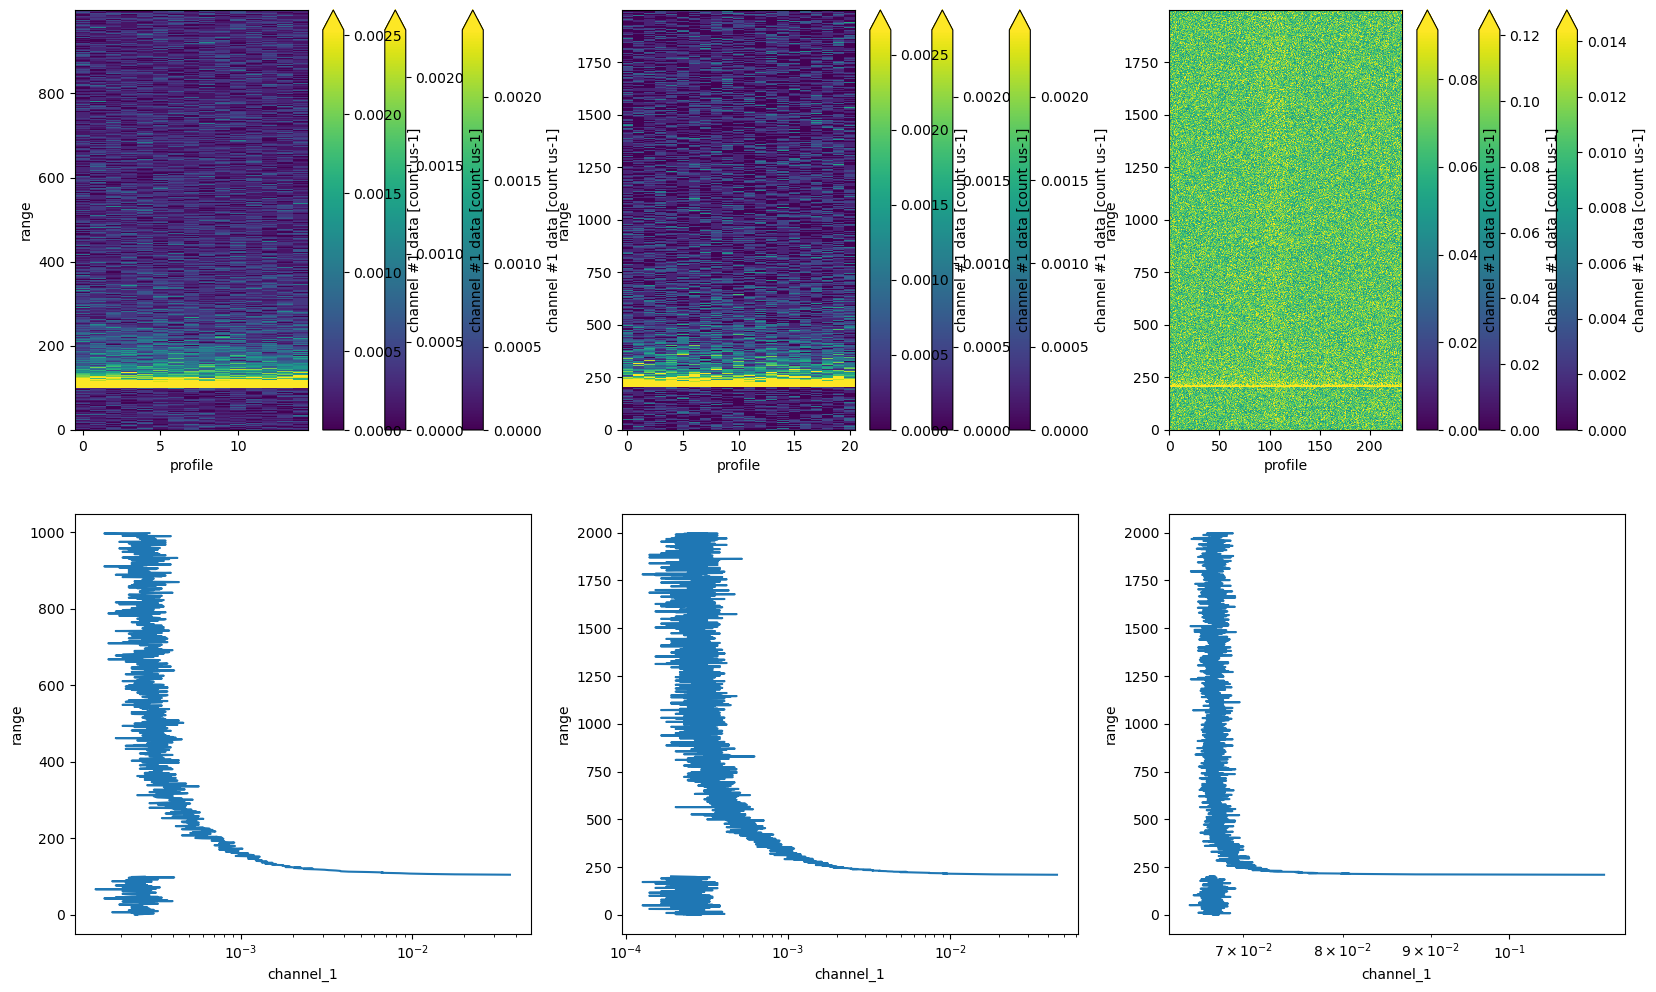

KeyboardInterrupt: Interrupted by user

In [9]:
fig,axs = plt.subplots(2,3,figsize=(20,12))

from IPython import display

for daystr in days_of_three:

    display.clear_output(wait=True)
    display.display(fig)
    
    for r in axs: # clear the axes so they can be reused
        for a in r:
            a.cla()

    # get the three files associated with calbration candidates for that day
    globstr = dir_root + '/' + daystr + '*.mpl.gz'

    dayfiles = glob.glob(globstr)
    calibFiles = sorted([f for f in dayfiles if f[-9:] != '00.mpl.gz'])

    ds1 = mplgz.load.load_mplgz(calibFiles[0])
    ds2 = mplgz.load.load_mplgz(calibFiles[1])
    ds3 = mplgz.load.load_mplgz(calibFiles[2])


    for d,a in zip([ds1,ds2,ds3],axs[0]):
        d.channel_1.plot(x='profile',y='range',vmin=0,robust=True,ax=a)

    for d,a in zip([ds1,ds2,ds3],axs[1]):
        d.channel_1.where(d.channel_1<1).mean(dim='profile').plot(y='range',ax=a)
        a.set_xscale('log')

    plt.show()
    input('something')
